<center>
    <img src="https://gitlab.com/ibm/skills-network/courses/placeholder101/-/raw/master/labs/module%201/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2021-03-25 07:22:47--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.1’

m4_survey_data.sqli 100%[===================>]  34.98M  16.1MB/s    in 2.2s    

2021-03-25 07:22:50 (16.1 MB/s) - ‘m4_survey_data.sqlite.1’ saved [36679680/36679680]



Connect to the database.


In [2]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [42]:
import pandas as pd  
import numpy as np 
%matplotlib inline    
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [104]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT * 
FROM master
"""  

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn) 
print(df.columns.tolist())

['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer', 'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel', 'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro', 'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek', 'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol', 'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs', 'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests', 'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs', 'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion', 'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer', 'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs', 'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents', 'SurveyLength', 'SurveyEase']


## Demo: How to list all tables


In [5]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [6]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [97]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
df

,sql
0,"CREATE TABLE ""master"" (\n""index"" INTEGER,\n ""..."


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f65e5e7d690>]],
      dtype=object)

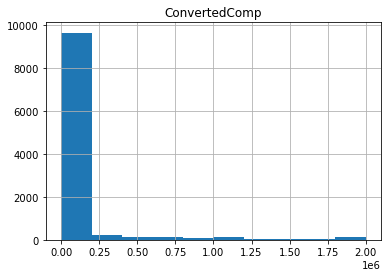

In [29]:
# your code goes here  
QUERY = """
SELECT ConvertedComp
FROM master
"""
df2 = pd.read_sql_query(QUERY,conn) 
df2 

df2.hist()


### Box Plots


Plot a box plot of `Age.`


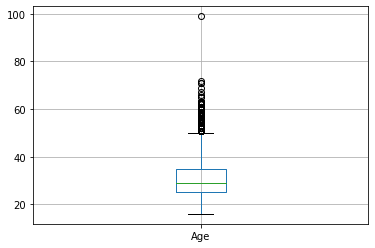

In [28]:
# your code goes here
QUERY = """
SELECT Age
FROM master
"""
df3 = pd.read_sql_query(QUERY,conn) 
df3

df3.boxplot()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


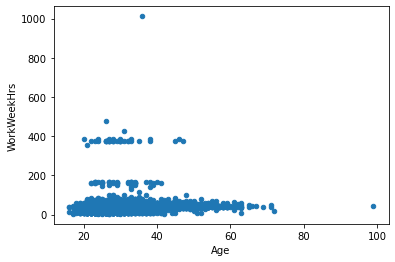

In [40]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs
FROM master
"""  

df4 = pd.read_sql_query(QUERY,conn) 
df4

df4.plot.scatter(x = 'Age', y = 'WorkWeekHrs')

### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


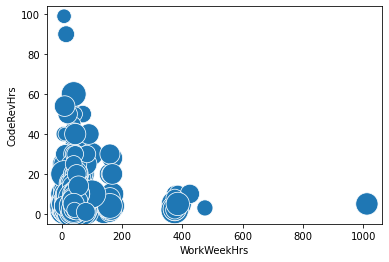

In [48]:
# your code goes here
QUERY = """
SELECT Age,WorkWeekHrs,CodeRevHrs
FROM master
"""  
df5 = pd.read_sql_query(QUERY,conn) 
df5  

sns.scatterplot(data=df5, x="WorkWeekHrs", y="CodeRevHrs", size="Age", legend=False, sizes=(20, 2000))  
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


In [161]:
QUERY = """
SELECT *
from DatabaseWorkedWith
"""      
df12=pd.read_sql_query(QUERY,conn)  
df12 

df_final=df12.drop_duplicates('Respondent')  
df_final.groupby('DatabaseWorkedWith')['Respondent'].count()

DatabaseWorkedWith
Cassandra                397
Couchbase                222
DynamoDB                 740
Elasticsearch           1404
Firebase                 959
MariaDB                 1023
Microsoft SQL Server    2318
MongoDB                 1311
MySQL                   1281
Oracle                   292
Other(s):                 94
PostgreSQL               665
Redis                     34
SQLite                   205
Name: Respondent, dtype: int64

In [155]:
QUERY = """
SELECT count(DatabaseWorkedWith) as Count,DatabaseWorkedWith, Respondent
from DatabaseWorkedWith   
group by DatabaseWorkedWith
order by count (DatabaseWorkedWith) DESC LIMIT 20
"""    

df11=pd.read_sql_query(QUERY,conn)  
df11 


,Count,DatabaseWorkedWith,Respondent
0,5469,MySQL,4
1,4110,Microsoft SQL Server,16
2,4097,PostgreSQL,9
3,3248,SQLite,4
4,3016,MongoDB,16
5,2508,Redis,22
6,1954,Elasticsearch,20
7,1744,Oracle,22
8,1709,MariaDB,20
9,1314,Firebase,13


,Count,DatabaseDesireNextYear
0,4328,PostgreSQL
1,3649,MongoDB
2,3331,Redis
3,3281,MySQL
4,2856,Elasticsearch


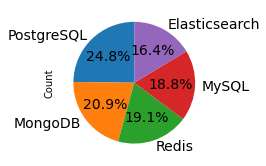

In [142]:
# your code goes here
QUERY = """
SELECT count(DatabaseDesireNextYear) as Count,DatabaseDesireNextYear
from DatabaseDesireNextYear 
group by DatabaseDesireNextYear 
order by count(DatabaseDesireNextYear) DESC LIMIT 5
"""    

df10=pd.read_sql_query(QUERY,conn)  
df10  

ax1 = plt.subplot(121, aspect='equal')
df10.plot(kind='pie', y = 'Count', ax=ax1, autopct='%1.1f%%', 
startangle=90, shadow=False, labels=df10['DatabaseDesireNextYear'], legend = False, fontsize=14)  

df10



### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5, 1.0, 'Median hours, by age')

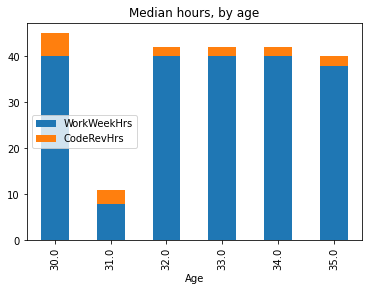

In [51]:
# your code goes here
QUERY = """
SELECT WorkWeekHrs,CodeRevHrs,Age
FROM master
where Age between 30 and 35
group by age
order by age 
"""  
df6 = pd.read_sql_query(QUERY,conn) 
df6 

df6.groupby('Age').median().plot.bar(stacked=True)
plt.title('Median hours, by age')


## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0.5, 1.0, 'Median ConvertedComp, by Age')

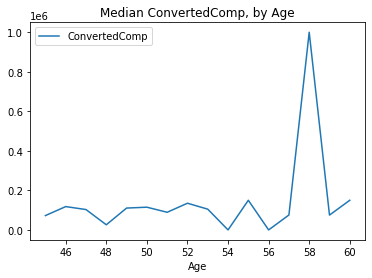

In [54]:
# your code goes here
QUERY = """
SELECT ConvertedComp,Age
FROM master
where Age between 45 and 60
group by age
order by age 
"""  

df7 = pd.read_sql_query(QUERY,conn) 
df7 

df7.groupby('Age').median().plot.line(stacked=True)
plt.title('Median ConvertedComp, by Age')

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


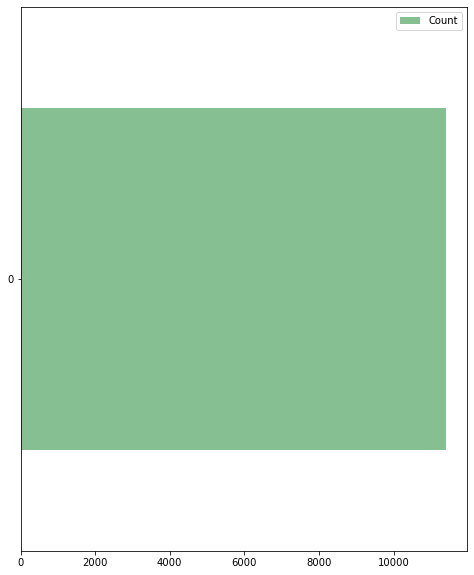

In [96]:
# your code goes here
QUERY = """   
SELECT MainBranch,COUNT (MainBranch) as Count 
FROM master    
"""  

df8 = pd.read_sql_query(QUERY,conn) 
df8  

df8.plot(kind='barh',figsize=(8, 10), color='#86bf91', zorder=2, width=0.85) 


Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
